# Part II - (Ford GoBike System Data Exploration and Visualization)
## by (Ojodu Uthman)


## Investigation Overview


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February. The aim of this project is to explore the dataset and ask important questions of the dataset such as which hour of the day has the most bikeshare rides and which age group uses the service most often.


## Dataset Overview

> The dataset used for this exploratory analysis consists of individual trip data for February 2019 in CSV format covering the greater San Francisco Bay area. The visualizations below are created from the wrangled and cleaned data to facilitate exploratory data analysis and help discover member usage pattern and member rider characteristics.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike.csv')
bike.head(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_hourofday,start_dayofweek,start_dayofmonth,age
0,1585,2019-02-28 23:54:00,2019-03-01 00:20:00,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,26.416667,23,Thursday,28,45
1,1793,2019-02-28 23:49:00,2019-03-01 00:19:00,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,29.883333,23,Thursday,28,60


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

### Customer types and their weekly Usage.
The subscribers were much more than the casual customers, with the subscribers with about 90% of the total users. The casual customers also have higher trip times than the subscribers.

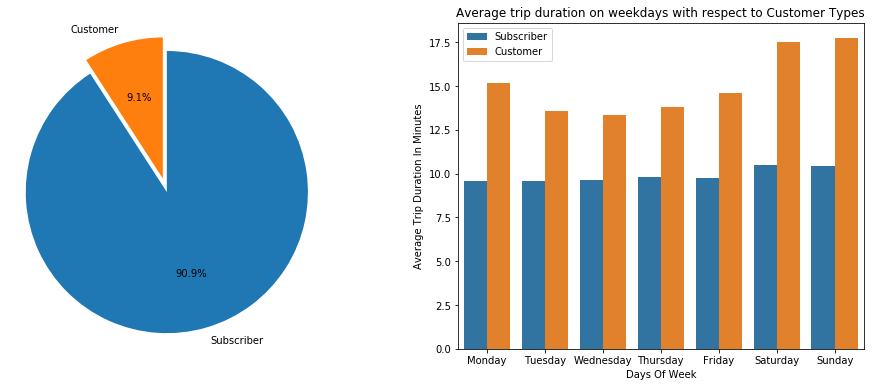

In [7]:
plt.figure(figsize=[16, 6]);
color = sb.color_palette('colorblind')[0];
plt.subplot(1, 2, 1);
sorted_vals = bike.user_type.value_counts()/bike.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%');
plt.axis('square');
plt.subplot(1, 2, 2);
orderbyDayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(data = genders, x = 'start_dayofweek', y = 'duration_minute',hue = 'user_type',order = orderbyDayOfWeek,ci = None)
plt.xlabel('Days Of Week')
plt.ylabel("Average Trip Duration In Minutes");
plt.title('Average trip duration on weekdays with respect to Customer Types');
plt.legend(['Subscriber','Customer']);

## (Visualization 2)

### Customer genders and their weekly usage

Majority of the customers were male members. Female members of the bike sharing service averaged more trip minutes than their male counterparts.

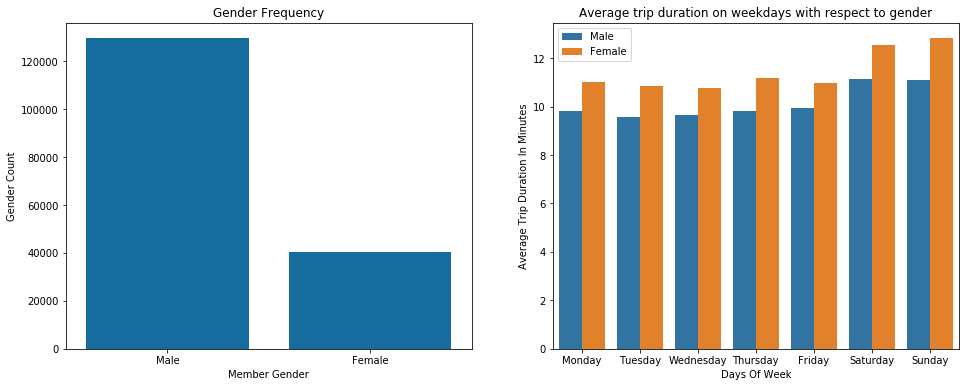

In [10]:
plt.figure(figsize=[16, 6]);
color = sb.color_palette('colorblind')[0];
plt.subplot(1, 2, 1);
sb.countplot(data = gender, x='member_gender', color = color)
plt.xlabel('Member Gender')
plt.ylabel("Gender Count");
plt.title('Gender Frequency')
plt.subplot(1, 2, 2);
sb.barplot(data = genders, x = 'start_dayofweek', y = 'duration_minute',hue = 'member_gender',order = orderbyDayOfWeek,ci = None)
plt.xlabel('Days Of Week')
plt.ylabel("Average Trip Duration In Minutes");
plt.legend(['Male','Female']);
plt.title('Average trip duration on weekdays with respect to gender');

## (Visualization 3)

### Hourly and Weekly trip distributions

The most common times during the week which had the most bike rides were the 08:00 and 17:00 hours which conicides with the time people mostly leave for work and return home from work. Most bike rides occured during the weekdays with the peak day being Thursdays, with a dip ocuuring on the weekends

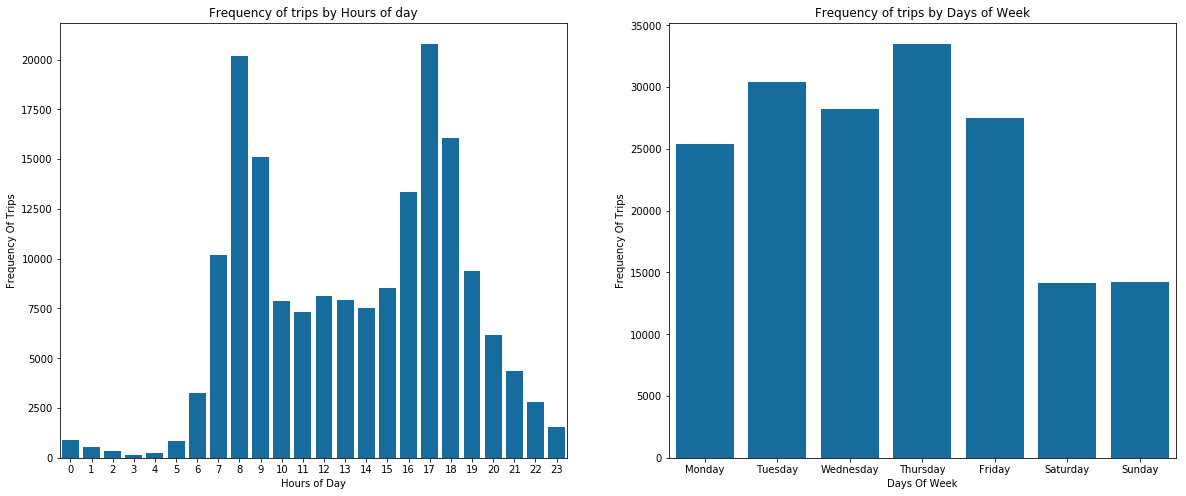

In [11]:
plt.figure(figsize=[20, 8]);
plt.subplot(1, 2, 1);
orderByHourOfDay = bike.sort_values(by=['start_hourofday'])
orderByHourOfDay = orderByHourOfDay.groupby('start_hourofday').start_hourofday.count().index
sb.countplot(data = bike, x = 'start_hourofday',order = orderByHourOfDay,color = color)
plt.xlabel('Hours of Day')
plt.ylabel('Frequency Of Trips')
plt.title('Frequency of trips by Hours of day')
plt.subplot(1, 2, 2);
orderbyDayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = bike, x = 'start_dayofweek',order = orderbyDayOfWeek,color = color)
plt.xlabel('Days Of Week')
plt.ylabel('Frequency Of Trips')
plt.title('Frequency of trips by Days of Week');

## (Visualization 4)

### Age distribution between different customer types and member genders
A higher distribution of the male members tend to be older than the female members. This might explain the reason female members average longer trip durations than the make members.A higher distribution of the subcribers tend to be slightly older than the casual customers. This might explain the reason subscribers tend to take shorter trips.

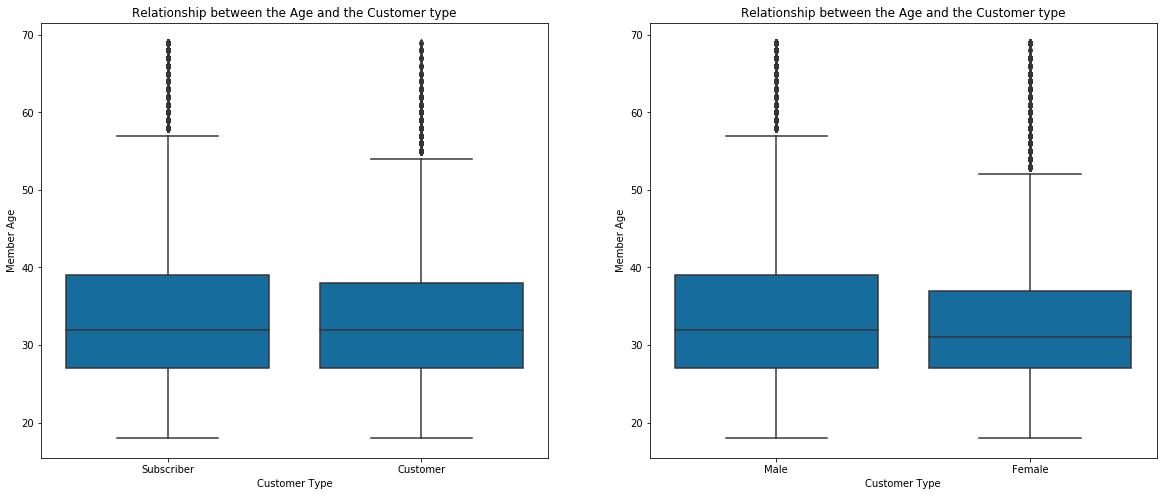

In [20]:
plt.figure(figsize=[20, 8]);
plt.subplot(1, 2, 1);
sb.boxplot(data=gender, x='user_type', y='age', color=color);
plt.xlabel('Customer Type');
plt.ylabel('Member Age');
plt.title("Relationship between the Age and the Customer type")
plt.subplot(1, 2, 2);
sb.boxplot(data=gender, x='member_gender', y='age', color=color);
plt.xlabel('Customer Type');
plt.ylabel('Member Age');
plt.title("Relationship between the Age and the Customer type");

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
